# Validating Simpler Model
In order to confirm our hypothesis that our process is not currently able generate meaningful posteriors, we further simplify the model and investigate its performance.

Contents:
- [Model](#Model)
- [Results](#Results)
- [Discussion](#Discussion)

### Model

We fix the hyper-parameters $\alpha$ and infer the hyper-posterior of $S$. We make these changes and then run this new model over the cluster, generating 960 samples that we analyze below.

### Results

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

test = np.loadtxt('justStest.txt')
seed_S = 0.1570168038792813

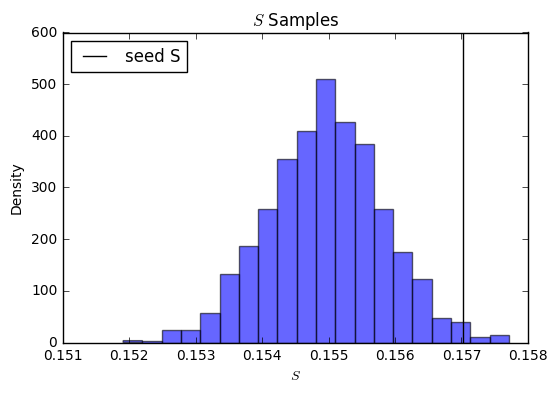

In [2]:
plt.hist(test[:,0], bins=20, alpha=0.6, normed=True);
plt.title('$S$ Samples')
plt.xlabel('$S$')
plt.ylabel('Density')
plt.gca().axvline(seed_S, color='k', label='seed S')
plt.legend(loc=2);

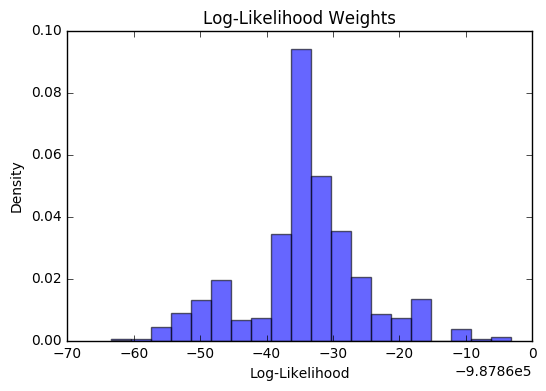

In [3]:
plt.hist(test[:,1], bins=20, alpha=0.6, normed=True);
plt.title('Log-Likelihood Weights')
plt.xlabel('Log-Likelihood')
plt.ylabel('Density')

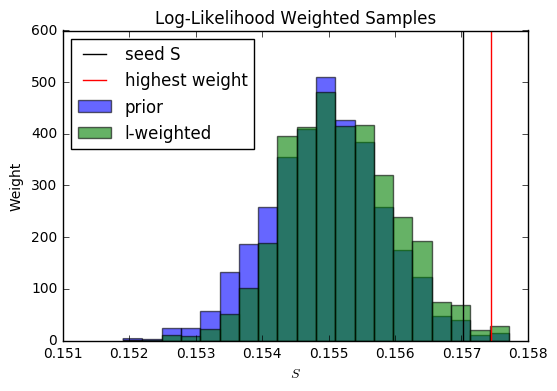

In [4]:
plt.hist(test[:,0], bins=20, alpha=0.6, normed=True, label='prior');
plt.hist(test[:,0], bins=20, alpha=0.6, \
         weights=((test[:,1] - test[:,1].min()) / (test[:,1].max() - test[:,1].min())),\
         normed=True,\
         label='l-weighted'
        );
plt.title('Log-Likelihood Weighted Samples')
plt.xlabel('$S$')
plt.ylabel('Weight')
plt.gca().axvline(seed_S, color='k', label='seed S')
plt.gca().axvline(test[:,0][np.argmax(test[:,1])], color='r', label='highest weight')
plt.legend(loc=2);

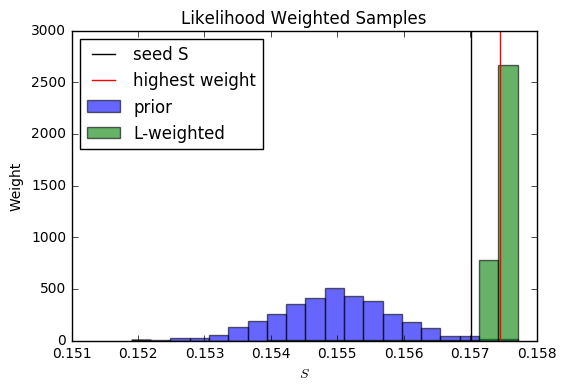

In [15]:
w = np.exp((test[:,1] - test[:,1].max()))
plt.hist(test[:,0], bins=20, alpha=0.6, normed=True, label='prior');
plt.hist(test[:,0], bins=20, alpha=0.6, \
         weights=w,\
         normed=True,\
         label='L-weighted'
        );
plt.title('Likelihood Weighted Samples')
plt.xlabel('$S$')
plt.ylabel('Weight')
plt.gca().axvline(seed_S, color='k', label='seed S')
plt.gca().axvline(test[:,0][np.argmax(test[:,1])], color='r', label='highest weight')
plt.legend(loc=2);

In [25]:
print np.min(w), np.max(w), np.sort(w)[-10:]

7.15851099999e-27 1.0 [  2.78935071e-04   3.14961809e-04   8.49480085e-04   9.09198943e-04
   2.15296258e-03   2.23480042e-03   4.00936170e-03   2.17792876e-01
   3.51397493e-01   1.00000000e+00]


We see that a few samples dominate the weight contribution.

In [12]:
np.sort(test[:,1])[::-1][:10]

array([-987863.15628033, -987864.20211757, -987864.68049111,
       -987868.67540356, -987869.25988369, -987869.29719077,
       -987870.15922696, -987870.22716639, -987871.2193395 ,
       -987871.34081186])

# Discussion

Both of the two failure modes we presented in the [previous notebook](ValidatingBigmaliAtScale_20170626.ipynb) reappear in this simpler, more isolated analysis, confirming our hypothesis. 

- **Failure Mode 1:** The posterior is not accurate, or meaningful.
- **Failure Mode 2:** The weight discrepencies are enormous and hence we end up with one sample dominating the inference.

First, the maximum likelihood S is not the true S. This is not due to lack of S samples either, as there are other samples much closer to the true value which have lower weight. Second, the weight discrepancies remain significant. 

In summary, this analysis has confirmed that the two previously presented failure modes prevent our process from producing meaningful results. Next we must dig into the specific failure modes and attempt to quantitatively model and characterize them. In the [next notebook](ValidatingLikelihoodVarianceAndSingleLikelihoodWeightDistribution_20170627.ipynb) in this series, we examine (i) the consistency of our likelihood computation and (ii) the distribution of individual halo likelihood weights.